# Лабораторная работа №2

ФИО:   
Группа: 

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 1. Импорт данных

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/admin/Desktop/AI/NY-House-Dataset.csv')  # если нужно, можно поменять разделитель
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


## 2. Описание постановки задачи

### Постановка задачи
#### Целевая переменная: PRICE (предсказываемое значение является непрерывным)

### Тип задачи
#### Входные переменные: BROKERTITLE, TYPE, BEDS, BATH, PROPERTYSQFT, и др.

### Переменные
#### Задача: предсказать цену недвижимости (PRICE) на основе других характеристик объекта.

## 3. Распределение целевой переменной (PRICE)

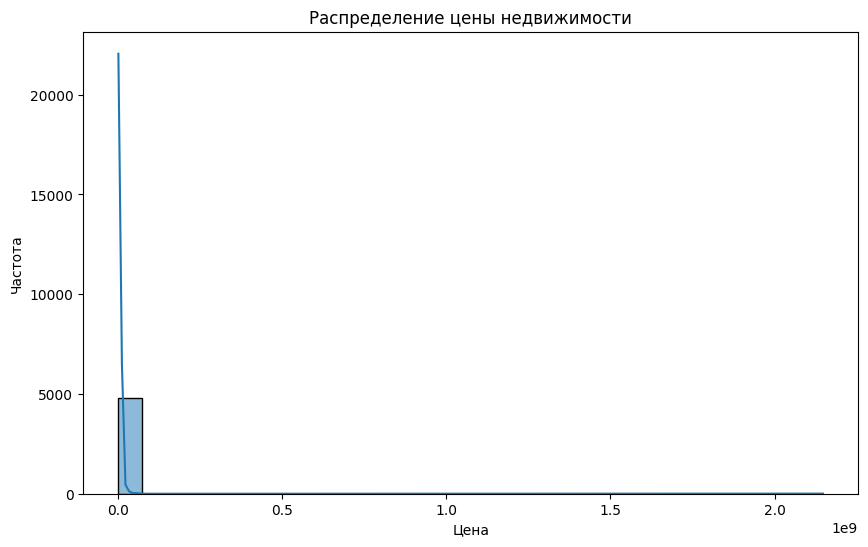

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data['PRICE'], bins=30, kde=True)
plt.title('Распределение цены недвижимости')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

In [49]:
unique_prices = data['PRICE'].nunique()
print(f"Количество уникальных значений целевой переменной (PRICE): {unique_prices}")

Количество уникальных значений целевой переменной (PRICE): 1274


## 4. Основные статистики по переменным

In [50]:
print(data.describe())

              PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.373861   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.946962   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450  


## 5. Основная информация по датасету

In [51]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

## 6. Количество пропусков в каждой колонке

In [52]:
missing_values = data.isnull().sum()
print("Количество пропусков в каждом столбце:")
print(missing_values)

Количество пропусков в каждом столбце:
BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


## 7. Гистограммы для пяти признаков

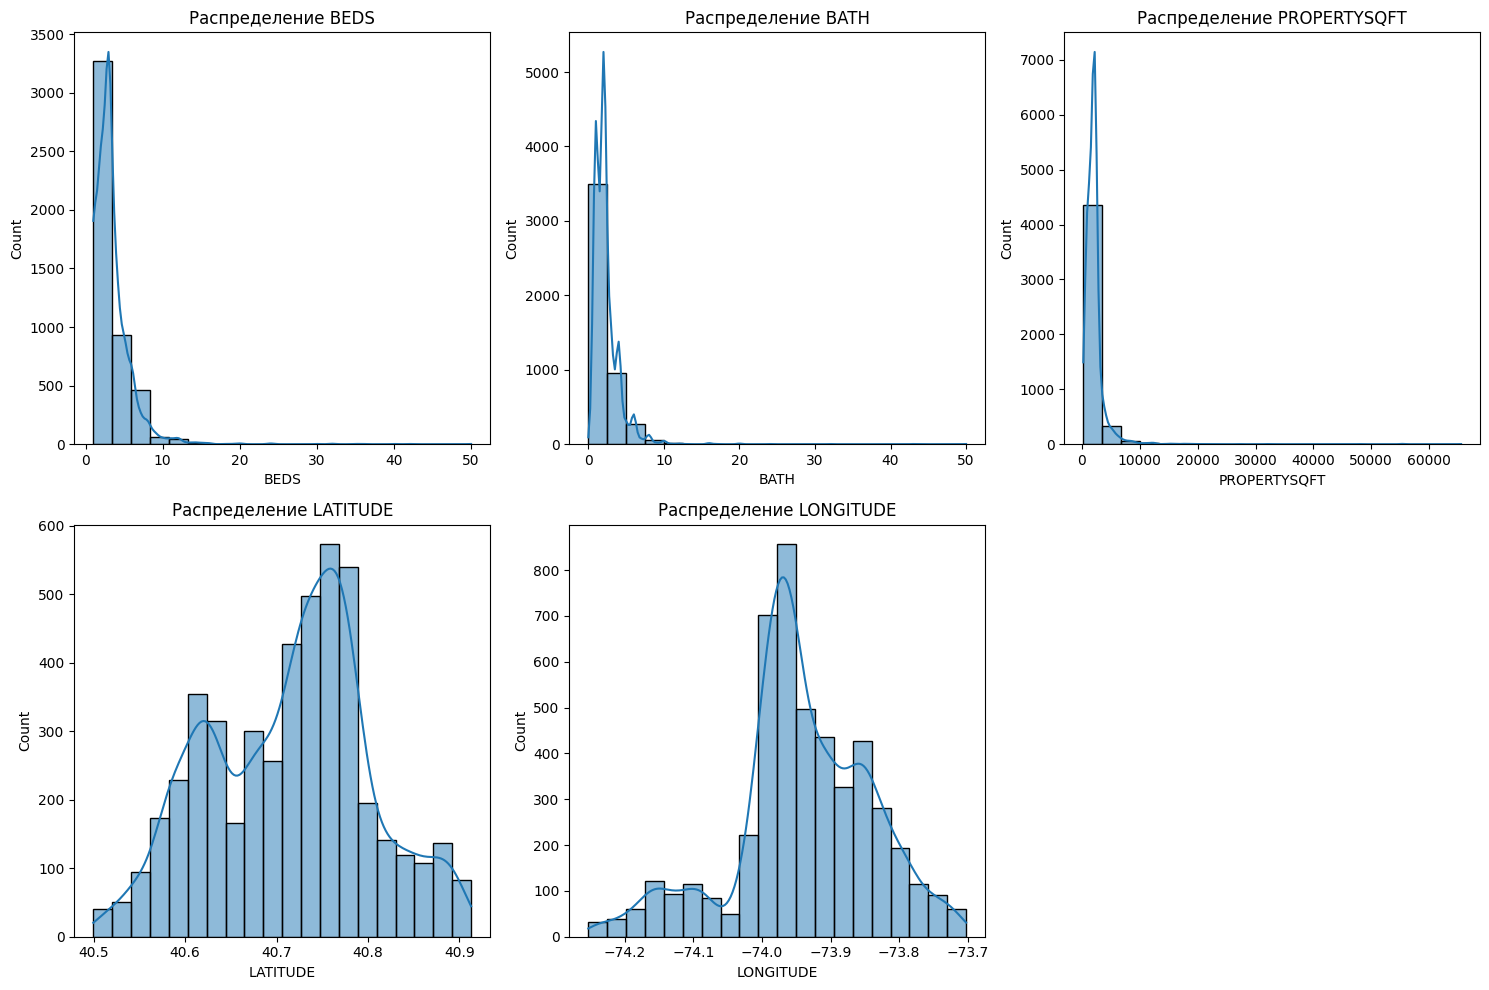

In [53]:
features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'Распределение {feature}')
plt.tight_layout()
plt.show()

## 8. Зависимость 5 признаков от целевой переменной

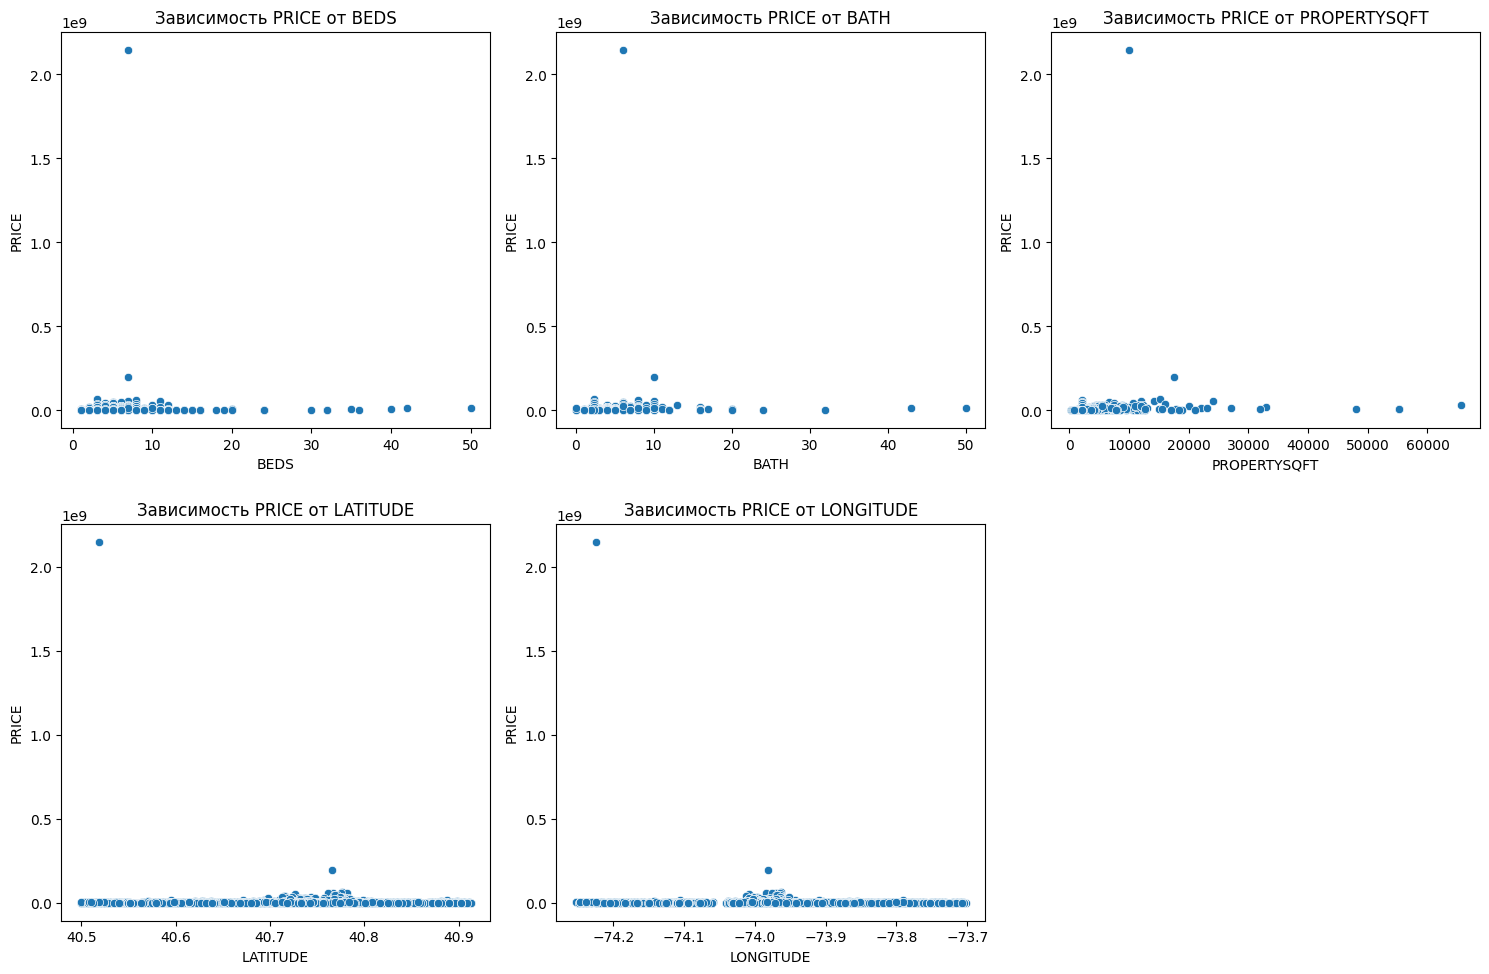

In [54]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data[feature], y=data['PRICE'])
    plt.title(f'Зависимость PRICE от {feature}')
plt.tight_layout()
plt.show()